Лабораторная работа 6. Выполнила Андрющенко К.С.

In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
M0 = 100  # начальный капитал
T = 50     # количество временных шагов
s_arr = np.linspace(0.01, 0.99, num=10)    # норма накоплений
d_arr = np.linspace(0.01, 0.99, num=10)   # норма амортизации
selected_s = [0.1, 0.5, 0.8]  # нормы накоплений выборочные
selected_d = [0.1, 0.3, 0.5]  # нормы амортизации выборочные

Функция моделирования процесса роста экономики

Модель экономического роста Солоу (чем-то похоже).  
Равенство инвестиций и сбережений $(I=S)$ является условием
равновесия, при этом инвестиции пропорциональны доходу.
Капитал: разница между продуктом и инвестициями.

Процесс роста экономики в представленной модели описывается динамикой изменения капитала (можно иногда брать просто (как в модли Солоу M(t), а можно как разница между продуктом и инвестициями), так как производство напрямую зависит от капитала, а капитал изменяется через инвестиции и амортизацию.

Состояния равновесие - стабилизации количества машин
𝑀.

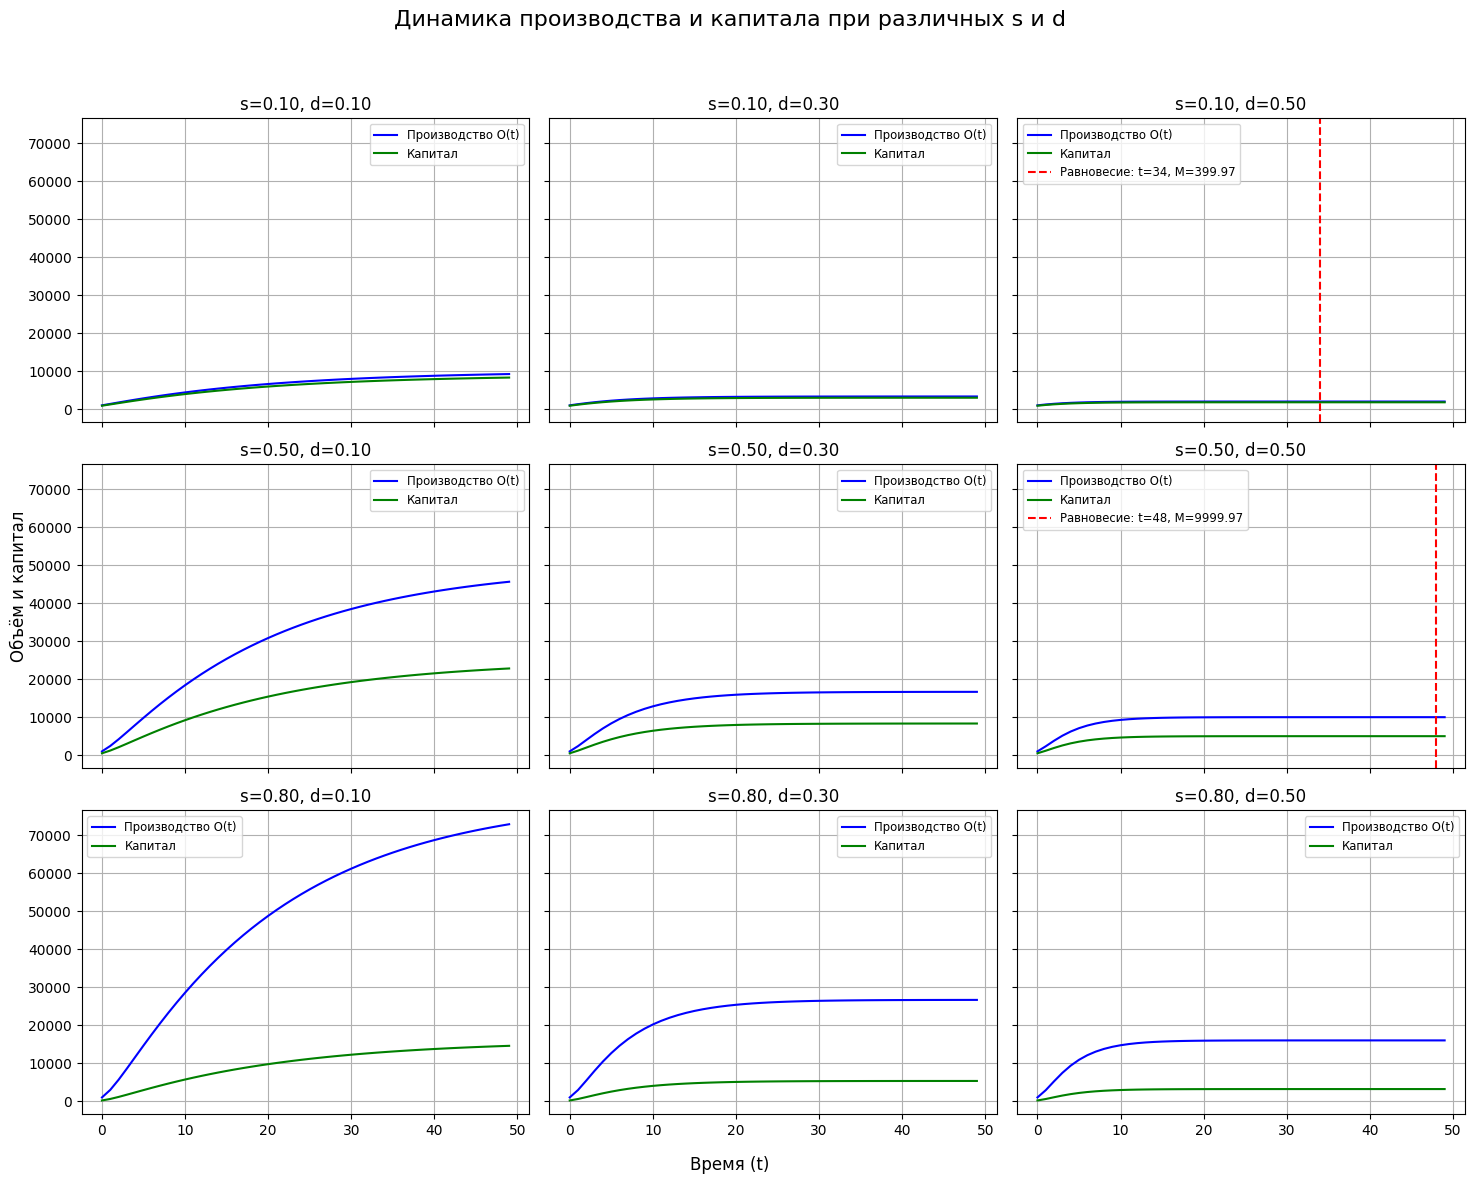

Анализ равновесия для различных s и d:
s=0.10, d=0.10: Равновесие не достигнуто
s=0.10, d=0.30: Равновесие не достигнуто
s=0.10, d=0.50: Равновесие достигнуто на t=34, количество машин M=399.97
s=0.50, d=0.10: Равновесие не достигнуто
s=0.50, d=0.30: Равновесие не достигнуто
s=0.50, d=0.50: Равновесие достигнуто на t=48, количество машин M=9999.97
s=0.80, d=0.10: Равновесие не достигнуто
s=0.80, d=0.30: Равновесие не достигнуто
s=0.80, d=0.50: Равновесие не достигнуто


In [13]:
def production(M):
    return 100 * np.sqrt(M)

def investment(O, s):
    return s * O

def next_machines(M, I, d):
    return M + I - d * M

def simulate_growth(s, d, T, M0):
    M = [M0]  # начальное количество машин
    O = []    # объём производства
    capital = []  # капитал
    for t in range(T):
        current_O = production(M[-1])
        O.append(current_O)
        I = investment(current_O, s)
        capital.append(current_O - I)
        next_M = next_machines(M[-1], I, d)
        M.append(next_M)

    return O, M[:-1], capital

def analyze_equilibrium(M, threshold=1e-2):
    # период достижения равновесия и значение
    for t in range(1, len(M)):
        if abs(M[t] - M[t - 1]) < threshold:
            return t, M[t]
    return None, None  # ybxtuj yt ljcnbuyenj
fig, axes = plt.subplots(len(selected_s), len(selected_d), figsize=(15, 12), sharex=True, sharey=True)
equilibrium_results = []

for i, s in enumerate(selected_s):
    for j, d in enumerate(selected_d):
        O, M, capital = simulate_growth(s, d, T, M0)
        # равновесие
        t_eq, M_eq = analyze_equilibrium(M)
        equilibrium_results.append((s, d, t_eq, M_eq))
        ax = axes[i, j]
        ax.plot(range(T), O, label="Производство O(t)", color="blue")
        ax.plot(range(T), capital, label="Капитал", color="green")
        if t_eq is not None:
            ax.axvline(t_eq, color="red", linestyle="--", label=f"Равновесие: t={t_eq}, M={M_eq:.2f}")
        ax.set_title(f"s={s:.2f}, d={d:.2f}")
        ax.legend(fontsize="small")
        ax.grid()

fig.supylabel("Объём и капитал")
fig.supxlabel("Время (t)")
fig.suptitle("Динамика производства и капитала при различных s и d", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print("Анализ равновесия для различных s и d:")
for s, d, t_eq, M_eq in equilibrium_results:
    if t_eq is not None:
        print(f"s={s:.2f}, d={d:.2f}: Равновесие достигнуто на t={t_eq}, количество машин M={M_eq:.2f}")
    else:
        print(f"s={s:.2f}, d={d:.2f}: Равновесие не достигнуто")

При малом значении s. Равновесие достигается только при большом коэффициенте амортизации
d=0.5. При низких инвестициях (малом s) производственная мощность не компенсирует амортизацию, если она низкая.
Обратная ситуация: при большом значении s=0.8
равновесие не достигается. Высокий уровень накоплений приводит к постоянному росту числа машин, система становится неустойчивой особенно при низком
d.

При умеренном уровне накоплений система способна достичь баланса, но только если амортизация компенсируется долгосрочным ростом числа машин.

* Для достижения стабильного экономического роста необходим баланс между накоплениями
s и амортизацией d.